# Intro

The goal of this project is to build a model that takes in tropical cyclone tracking data and classifies accurately whether readings indicate that a storm is a severe Tropical Storm or a less disruptive disturbance. 

## Business Case

The resulting model will be used by meterologists to understand whether an incoming storm is a major threat to a certain area, and therefore inform news agenices, local governments, and the public to prepare accordingly. 

## Data Understanding

The data for this project is from the National Oceanic and Atmospheric Administration's International Best Track Archive for Climate Stewardship (IBTrACS) project. The goal of this project is make available tropical cyclone best track data to aid understanding of the distribution, frequency, and intensity of tropical cyclones worldwide.

Because the idea is to have a global data source, this data is pulled from many separate agenices worldwide, and therefore has many columns that are duplicative, inconsistent, or difficult to interpret. When doing this analysis, reference was made to the data documentation saved in this repository.

[Source](https://www.ncdc.noaa.gov/ibtracs/index.php)

I'll start by importing my data (and all my other imports) to describe it further.

In [93]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/ibtracs.since1980.list.v04r00.csv', dtype='object', parse_dates=True, skiprows=[1], na_values=' ')
#drop first row as it's a multi index

pd.set_option('display.max_columns', None)
df.head(3)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,USA_AGENCY,USA_ATCF_ID,USA_LAT,USA_LON,USA_RECORD,USA_STATUS,USA_WIND,USA_PRES,USA_SSHS,USA_R34_NE,USA_R34_SE,USA_R34_SW,USA_R34_NW,USA_R50_NE,USA_R50_SE,USA_R50_SW,USA_R50_NW,USA_R64_NE,USA_R64_SE,USA_R64_SW,USA_R64_NW,USA_POCI,USA_ROCI,USA_RMW,USA_EYE,TOKYO_LAT,TOKYO_LON,TOKYO_GRADE,TOKYO_WIND,TOKYO_PRES,TOKYO_R50_DIR,TOKYO_R50_LONG,TOKYO_R50_SHORT,TOKYO_R30_DIR,TOKYO_R30_LONG,TOKYO_R30_SHORT,TOKYO_LAND,CMA_LAT,CMA_LON,CMA_CAT,CMA_WIND,CMA_PRES,HKO_LAT,HKO_LON,HKO_CAT,HKO_WIND,HKO_PRES,NEWDELHI_LAT,NEWDELHI_LON,NEWDELHI_GRADE,NEWDELHI_WIND,NEWDELHI_PRES,NEWDELHI_CI,NEWDELHI_DP,NEWDELHI_POCI,REUNION_LAT,REUNION_LON,REUNION_TYPE,REUNION_WIND,REUNION_PRES,REUNION_TNUM,REUNION_CI,REUNION_RMW,REUNION_R34_NE,REUNION_R34_SE,REUNION_R34_SW,REUNION_R34_NW,REUNION_R50_NE,REUNION_R50_SE,REUNION_R50_SW,REUNION_R50_NW,REUNION_R64_NE,REUNION_R64_SE,REUNION_R64_SW,REUNION_R64_NW,BOM_LAT,BOM_LON,BOM_TYPE,BOM_WIND,BOM_PRES,BOM_TNUM,BOM_CI,BOM_RMW,BOM_R34_NE,BOM_R34_SE,BOM_R34_SW,BOM_R34_NW,BOM_R50_NE,BOM_R50_SE,BOM_R50_SW,BOM_R50_NW,BOM_R64_NE,BOM_R64_SE,BOM_R64_SW,BOM_R64_NW,BOM_ROCI,BOM_POCI,BOM_EYE,BOM_POS_METHOD,BOM_PRES_METHOD,NADI_LAT,NADI_LON,NADI_CAT,NADI_WIND,NADI_PRES,WELLINGTON_LAT,WELLINGTON_LON,WELLINGTON_WIND,WELLINGTON_PRES,DS824_LAT,DS824_LON,DS824_STAGE,DS824_WIND,DS824_PRES,TD9636_LAT,TD9636_LON,TD9636_STAGE,TD9636_WIND,TD9636_PRES,TD9635_LAT,TD9635_LON,TD9635_WIND,TD9635_PRES,TD9635_ROCI,NEUMANN_LAT,NEUMANN_LON,NEUMANN_CLASS,NEUMANN_WIND,NEUMANN_PRES,MLC_LAT,MLC_LON,MLC_CLASS,MLC_WIND,MLC_PRES,USA_GUST,BOM_GUST,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,1980001S13173,1980,1,SP,MM,PENI,1980-01-01 00:00:00,TS,-12.5000,172.500,NaN,NaN,NaN,main,647,647,O________OO_O_,jtwc_sh,SH051980,-12.5000,172.500,NaN,NaN,25,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12.5000,172.500,TC,25,NaN,-12.5000,172.500,1,25,NaN,NaN,NaN,NaN,NaN,NaN,-12.5000,172.500,TC,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,351
1,1980001S13173,1980,1,SP,MM,PENI,1980-01-01 03:00:00,TS,-12.1927,172.441,NaN,NaN,NaN,main,653,653,P________PP_P_,NaN,SH051980,-12.1825,172.432,NaN,NaN,25,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12.1825,172.432,TC,25,NaN,-12.2234,172.469,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12.1825,172.432,TC,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,351
2,1980001S13173,1980,1,SP,MM,PENI,1980-01-01 06:00:00,TS,-11.9144,172.412,NaN,NaN,NaN,main,670,670,O________OP_O_,jtwc_sh,SH051980,-11.9000,172.400,NaN,NaN,25,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.9000,172.400,TC,25,NaN,-11.9575,172.450,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.9000,172.400,TC,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,358


In [3]:
print(df.shape)

(271883, 163)


The size of the file is really large but it will get smaller throughout the cleaning process. To start off with, there are 163 columns and they are all reading in as object datatypes. I'll need to go through and clean these up.

In [4]:
df.columns = [x.lower() for x in df.columns]
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271883 entries, 0 to 271882
Data columns (total 163 columns):
sid                 object
season              object
number              object
basin               object
subbasin            object
name                object
iso_time            object
nature              object
lat                 object
lon                 object
wmo_wind            object
wmo_pres            object
wmo_agency          object
track_type          object
dist2land           object
landfall            object
iflag               object
usa_agency          object
usa_atcf_id         object
usa_lat             object
usa_lon             object
usa_record          object
usa_status          object
usa_wind            object
usa_pres            object
usa_sshs            object
usa_r34_ne          object
usa_r34_se          object
usa_r34_sw          object
usa_r34_nw          object
usa_r50_ne          object
usa_r50_se          object
usa_r50_sw          obje

The dataset has readings for storms at multiple points in their progression. There are 4,458 unique storms tracked.

In [5]:
df['sid'].nunique()

4458

My classification task will be to identify whether they are minor storms or severe Tropical Storms. Looking at my target column, 'nature', I can see six different classes that I want to sort into two so this will be a binary - severe storm or not severe. 

NR, not reported, and MX, mixture will be removed as they don't tell me anything. TS, tropical storm, will be my '1' - a severe storm. ET, DS, and SS are extratropical, disturbance, and subtropical - less severe storms. These will be my '0' class. 

In [6]:
df['nature'].unique()

array(['TS', 'NR', 'ET', 'MX', 'SS', 'DS'], dtype=object)

## Data Exploration & Cleaning

The first thing I'm going to do is engineer my Y by making a binary column.

In [7]:
#removing unclassified rows
df.drop(df.loc[df['nature'] == 'NR'].index, inplace=True)
df.drop(df.loc[df['nature'] == 'MX'].index, inplace=True)

#new column  
df['target'] = 0

# loop through the data and input a 1 where the storm is a Tropical storm
for row in df.index:
    if df['nature'][row] == 'TS':
        df['target'][row] = 1

In [8]:
df['target'].value_counts(normalize=True)

1    0.897215
0    0.102785
Name: target, dtype: float64

So there is a pretty severe class imbalance here that I will need to address during modeling. 

Now I want to define my features. Taking a preliminary look through the columns in the dataframe and the documentation as a guide, I'm selecting the following as potential features to explore. This is a lot less than 163! A lot of these were blank, repeats, or not useful info.

In [9]:
initial_feats = ['sid', 'season', 'basin', 'subbasin', 'lat', 'lon', 
                 'wmo_wind', 'dist2land', 'ds824_wind', 'td9636_stage', 'storm_speed', 'storm_dir']
xs_df = df[initial_feats]

#changing to numeric 
xs_df[['lat', 'lon', 'dist2land', 'season', 'wmo_wind', 'ds824_wind', 'td9636_stage', 'storm_speed', 'storm_dir']] = xs_df[['lat', 'lon', 'dist2land', 'season', 'wmo_wind', 'ds824_wind', 'td9636_stage', 'storm_speed', 'storm_dir']].apply(pd.to_numeric)

#taking my datetime object and pulling out the week as a feature
df['iso_time'] = pd.to_datetime(df['iso_time'])
xs_df['week_of_year'] = df['iso_time'].dt.week

In [10]:
xs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226423 entries, 0 to 271072
Data columns (total 13 columns):
sid             226423 non-null object
season          226423 non-null int64
basin           190696 non-null object
subbasin        197687 non-null object
lat             226423 non-null float64
lon             226423 non-null float64
wmo_wind        91501 non-null float64
dist2land       226423 non-null int64
ds824_wind      4139 non-null float64
td9636_stage    40790 non-null float64
storm_speed     226422 non-null float64
storm_dir       226422 non-null float64
week_of_year    226423 non-null int64
dtypes: float64(7), int64(3), object(3)
memory usage: 34.2+ MB


So now I have a clearer picture of what my data looks like. I'm going to drop the wind column with only 4K values, and inspect the other columns with nulls more closely. For now I am just focusing on the numerics.

In [11]:
xs_df = xs_df.drop('ds824_wind', axis=1)
y_df = df['target'].to_frame()
clean_df = pd.concat([xs_df, y_df], axis=1)

In [12]:
clean_df.head()

,sid,season,basin,subbasin,lat,lon,wmo_wind,dist2land,td9636_stage,storm_speed,storm_dir,week_of_year,target
0,1980001S13173,1980,SP,MM,-12.5000,172.500,NaN,647,1.0,6.0,351.0,1,1
1,1980001S13173,1980,SP,MM,-12.1927,172.441,NaN,653,1.0,6.0,351.0,1,1
2,1980001S13173,1980,SP,MM,-11.9144,172.412,NaN,670,1.0,5.0,358.0,1,1
3,1980001S13173,1980,SP,MM,-11.6863,172.435,NaN,682,1.0,4.0,12.0,1,1
4,1980001S13173,1980,SP,MM,-11.5000,172.500,NaN,703,1.0,4.0,22.0,1,1


In [13]:
clean_df['wmo_wind'].isna().sum()/len(clean_df['wmo_wind'])

0.5958846936927785

In [14]:
clean_df['td9636_stage'].isna().sum()/len(clean_df['td9636_stage'])

0.8198504568882137

It appears that the majority of wmo_wind and td9636_stage are also null. I want to look at my data grouped by storm ID to see if there are any other trends I can identify.

In [15]:
pd.set_option('display.max_rows', None)
grouped_df = clean_df.groupby(['sid']).max()
grouped_df

,season,lat,lon,wmo_wind,dist2land,td9636_stage,storm_speed,storm_dir,week_of_year,target
sid,,,,,,,,,,
1980001S13173,1980,-11.15250,1.895000e+02,65.0,934,4.0,22.0,358.0,1,1
1980002S15081,1980,-13.88250,8.000000e+01,29.0,2230,NaN,7.0,320.0,1,1
1980003S15137,1980,-14.66000,1.610000e+02,50.0,818,2.0,26.0,237.0,2,1
1980005S11059,1980,-11.00000,5.900000e+01,25.0,1014,NaN,35.0,308.0,1,1
1980005S14120,1980,-13.63330,1.207000e+02,115.0,490,4.0,20.0,339.0,2,1
1980009S14066,1980,-12.00000,6.680000e+01,20.0,1328,NaN,7.0,355.0,2,1
1980010S20043,1980,-16.00000,5.300000e+01,29.0,282,NaN,15.0,354.0,2,1
1980010S22048,1980,-25.30000,5.130000e+01,29.0,410,NaN,16.0,170.0,2,1
1980015S18060,1980,-16.75840,6.800000e+01,NaN,1227,4.0,29.0,353.0,5,1


In [16]:
grouped_df['wmo_wind'].isna().sum()/len(grouped_df)

0.1196319018404908

In [17]:
grouped_df['td9636_stage'].isna().sum()/len(grouped_df)

0.8105828220858896

So from looking at the data grouped by storm ID, I can see that the 'stage' feature stopped being recorded altogether in the 90s. This feature isn't going to be useful to me so I'm going to drop it. 11% of the storms have no wind speed recorded, so I could potentially fill that with an imputed value. 

In [18]:
clean_df = clean_df.drop(['td9636_stage'], axis=1)
clean_df.head()

,sid,season,basin,subbasin,lat,lon,wmo_wind,dist2land,storm_speed,storm_dir,week_of_year,target
0,1980001S13173,1980,SP,MM,-12.5000,172.500,NaN,647,6.0,351.0,1,1
1,1980001S13173,1980,SP,MM,-12.1927,172.441,NaN,653,6.0,351.0,1,1
2,1980001S13173,1980,SP,MM,-11.9144,172.412,NaN,670,5.0,358.0,1,1
3,1980001S13173,1980,SP,MM,-11.6863,172.435,NaN,682,4.0,12.0,1,1
4,1980001S13173,1980,SP,MM,-11.5000,172.500,NaN,703,4.0,22.0,1,1


I also took a look at how my features interact, and from the visuals I ran, it appears that there aren't clear linear relationships or correlations between the features and classes. 

To reduce the runtime/length of this notebook, the correlation and pairplot have been run in a separate notebook.

<img src="images/pairplot.png" width=800>

## Modeling

For my first baseline model, I'm using a pipeline to impute null values, scale features, and One Hot Encode my categorical objects. I'm going to run Logistic regression and set the 'class weight' parameter to balanced, which adjusts the weighting of each class.

In [19]:
y = clean_df['target']
X =  clean_df.drop(columns=['target', 'sid'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Preprocessing and First Model: Logistic Regression

I am using a pipeline for my preprocessing to help streamline the column transforming & scaling of features as I will run several models.

In [20]:
# making a list of numerical and object columns

num_cols = []
ohe_cols = []
    
for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif X[c].dtype in ['object']:
        ohe_cols.append(c)

In [21]:
#will be filling the wmo_wind column with median values and the basin columns with most frequent occuring labels

num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

ohe_transformer = Pipeline(steps=[
    ('str_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='error'))])

In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat_ohe', ohe_transformer, ohe_cols) 
        ])

In [23]:
preprocessor.fit_transform(X_train).shape

(169817, 22)

In [24]:
#using pipeline to run the preprocessing and instantiate the linear regression in one step

clf_logreg = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegression(class_weight='balanced'))])

clf_logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['season', 'lat', 'lon',
                                                   'wmo_wind', 'dist2land',
                                                   'storm_speed', 'storm_dir',
                                                   'week_of_year']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('str_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
          

In [25]:
#getting predictions
train_preds = clf_logreg.predict(X_train)
test_preds = clf_logreg.predict(X_test)

### First Model Evaluation

Before I move on, I want to define what evaluation metrics I'll use initially so I know how to optimize my model.

In this scenario, a false positive would mean that my model flagged a storm as severe when it wasn't. This would mean a false alarm scenarion where resources were spent preparing for a storm that didn't have a large impact. A false negative would mean that a severe hurricane was not flagged, which could cause unsafe conditions and potentially, preventable harm to communities. Although we don't want to waste resources, it's clear that the false negative is the worse outcome, so I will optimize my model to prevent that.

Therefore I want to mainly focus on recall, but I also want to run all metrics so I can understand my model's overall strengths and weaknesses. I'll use classification report for this. Below, I'm writing a function to show my train vs test scores.

In [26]:
def scores(y_train, train_preds, y_test, test_preds):
    print("Training Score:")
    print(classification_report(y_train, train_preds))
    print("------------------------------------------------------")
    print("Test Score:")
    print(classification_report(y_test, test_preds))

In [27]:
scores(y_train, train_preds, y_test, test_preds)

Training Score:
              precision    recall  f1-score   support

           0       0.31      0.80      0.45     17424
           1       0.97      0.80      0.88    152393

    accuracy                           0.80    169817
   macro avg       0.64      0.80      0.66    169817
weighted avg       0.90      0.80      0.83    169817

------------------------------------------------------
Test Score:
              precision    recall  f1-score   support

           0       0.32      0.81      0.46      5849
           1       0.97      0.80      0.88     50757

    accuracy                           0.80     56606
   macro avg       0.65      0.81      0.67     56606
weighted avg       0.91      0.80      0.84     56606



Another way to look at this is with a confusion matrix. With both, I can see my recall is not bad, however precision is low when predicting my '0' class, bringing down the accuracy of my model. 

Since I expect this is due to class imbalance, I am going to use a loop to test different class weightings within linear regression to see if they help improve the model. I'll plot the results against each other with a ROC curve

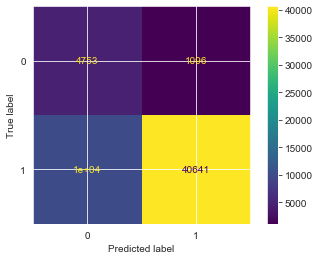

In [28]:
plot_confusion_matrix(clf_logreg, X_test, y_test)

AUC for None: 0.8809588364727694
-------------------------------------------------------------------------------------
AUC for Balanced: 0.8886019166148668
-------------------------------------------------------------------------------------
AUC for 2 to 1: 0.8854214957807558
-------------------------------------------------------------------------------------
AUC for 10 to 1: 0.8885366304702456
-------------------------------------------------------------------------------------
AUC for 100 to 1: 0.8832768920768999
-------------------------------------------------------------------------------------
AUC for 1000 to 1: 0.8773766474936869
-------------------------------------------------------------------------------------


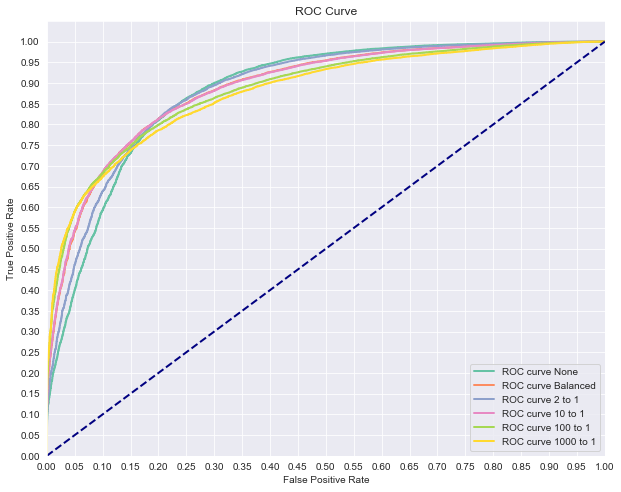

In [54]:
weights = [None, 'balanced', {0:2, 1:1}, {0:10, 1:1}, {0:100, 1:1}, {0:1000, 1:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10,8))
for n, weight in enumerate(weights):
    clf_logreg = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegression(fit_intercept=False, class_weight=weight, C=1000))])

    clf_logreg.fit(X_train, y_train)
    y_score = clf_logreg.fit(X_train, y_train).decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

There's not... a ton of difference. Note: I also tried iterating over different C values and saw barely any difference. I'm going to try a different model type. I want to experiment with tree based models since my features are non-linear.

### Second Model: Decision Tree

I'm building a decision tree model before I go into anything more complex, in hopes that it will help bring out more understanding of my data.

In [56]:
clf_tree = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', DecisionTreeClassifier(random_state=10, class_weight='balanced'))])

clf_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['season', 'lat', 'lon',
                                                   'wmo_wind', 'dist2land',
                                                   'storm_speed', 'storm_dir',
                                                   'week_of_year']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('str_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
          

In [57]:
train_preds = clf_tree.predict(X_train)
test_preds = clf_tree.predict(X_test)

### Second Model Evaluation & Tuning

In [58]:
scores(y_train, train_preds, y_test, test_preds)

Training Score:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17424
           1       1.00      1.00      1.00    152393

    accuracy                           1.00    169817
   macro avg       1.00      1.00      1.00    169817
weighted avg       1.00      1.00      1.00    169817

------------------------------------------------------
Test Score:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      5849
           1       0.98      0.98      0.98     50757

    accuracy                           0.97     56606
   macro avg       0.92      0.91      0.92     56606
weighted avg       0.97      0.97      0.97     56606



The scores of this model increased quite a bit, but it's overfit, and is especially not performing as well in terms of recall on the test set. I can see that it's still struggling to predict the 0's.

Note: I plotted this tree and the number of splits was out of control, such that showing the tree plot took too long to run. I'm running it again with a grid search to see if I can prevent the overfitting.  

In [33]:
#testing parameters that will reduce the shape of the tree
dt_param_grid = {
    'classifier__max_depth': [4, 6, 8],
    'classifier__min_samples_split': [5, 8, 10],
    'classifier__min_samples_leaf': [4, 6, 8]   
}

In [34]:
dt_grid_search = GridSearchCV(clf_tree, dt_param_grid, cv=3)
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['season',
                                                                          'lat',
                                                                          'lon',
                                                                          'wmo_wind',
                                                                        

In [35]:
print(dt_grid_search.best_params_)

{'classifier__max_depth': 8, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}


In [36]:
print(dt_grid_search.best_score_)

0.8487665996949327


The hyperparameters that worked best are mostly larger values. I'm goign to run a decision tree again with those and see how it does.

In [37]:
clf_tree_2 = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', DecisionTreeClassifier(random_state=10, class_weight='balanced', 
                                                                  max_depth=8, min_samples_leaf=4, min_samples_split=10))])

clf_tree_2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['season', 'lat', 'lon',
                                                   'wmo_wind', 'dist2land',
                                                   'storm_speed', 'storm_dir',
                                                   'week_of_year']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('str_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
          

In [38]:
train_preds = clf_tree_2.predict(X_train)
test_preds = clf_tree_2.predict(X_test)

In [39]:
scores(y_train, train_preds, y_test, test_preds)

Training Score:
              precision    recall  f1-score   support

           0       0.38      0.98      0.55     17424
           1       1.00      0.82      0.90    152393

    accuracy                           0.84    169817
   macro avg       0.69      0.90      0.73    169817
weighted avg       0.93      0.84      0.86    169817

------------------------------------------------------
Test Score:
              precision    recall  f1-score   support

           0       0.39      0.97      0.55      5849
           1       1.00      0.82      0.90     50757

    accuracy                           0.84     56606
   macro avg       0.69      0.90      0.73     56606
weighted avg       0.93      0.84      0.87     56606



In [40]:
# clf_tree.steps[1][1].feature_importances_

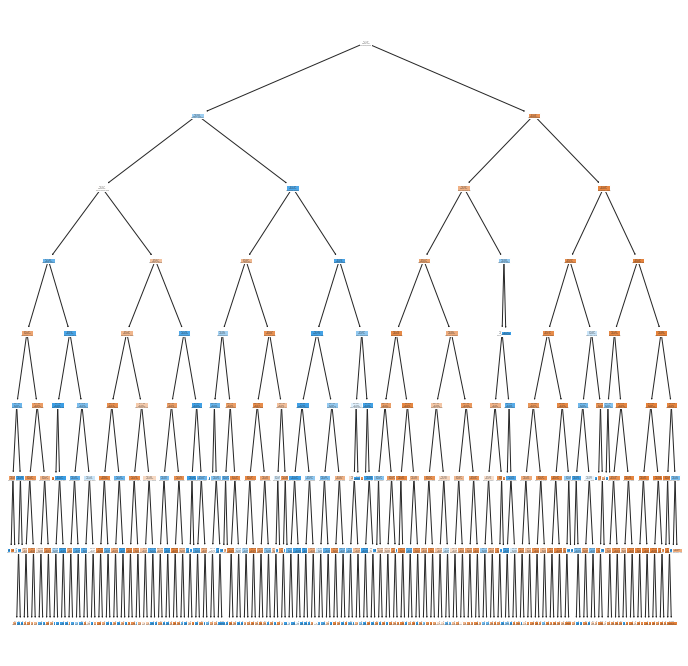

In [41]:
from sklearn import tree

plt.figure(figsize=(12,12))
tree.plot_tree(clf_tree_2.steps[1][1], filled=True)
plt.show()

Recall is actually looking very strong with this model, but precision is low on the 0 class and accuracy is still worse that just guessing 1. However, the tuning seems to have greatly reduced the overfitting. 

Lookng at the actual visual of the tree, it still doesn't look like it can be a generalizeable model. I'm going to try a random forest to try to reduce the sensitivity of the model even further.

### Third Model: Random Forest

I'm instantiating a Random Forest classifier, setting the class weight to balanced, and running another gridsearch to understand which hyperparameters work best.

In [59]:
clf_forest = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier(class_weight='balanced_subsample', random_state=10))])

clf_forest.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['season', 'lat', 'lon',
                                                   'wmo_wind', 'dist2land',
                                                   'storm_speed', 'storm_dir',
                                                   'week_of_year']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('str_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
          

In [43]:
# mean_cv_score = np.mean(cross_val_score(clf_forest, X_train, y_train, cv=3))

In [60]:
rf_param_grid = {
    'classifier__n_estimators': [10, 30, 100],
    'classifier__min_samples_split': [5, 10],
    'classifier__min_samples_leaf': [2, 4, 6],
    'classifier__max_depth': [3, 4, 5]
}


In [61]:
rf_grid_search = GridSearchCV(clf_forest, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['season',
                                                                          'lat',
                                                                          'lon',
                                                                          'wmo_wind',
                                                                        

In [62]:
rf_grid_search.best_params_

{'classifier__max_depth': 3,
 'classifier__min_samples_leaf': 2,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 10}

In [70]:
clf_forest_2 = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier(class_weight='balanced', min_samples_leaf=2, 
                                                                   max_depth=3, min_samples_split=5, n_estimators=10))])

clf_forest_2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['season', 'lat', 'lon',
                                                   'wmo_wind', 'dist2land',
                                                   'storm_speed', 'storm_dir',
                                                   'week_of_year']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('str_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
          

In [48]:
# mean_cv_score = np.mean(cross_val_score(clf_forest, X_train, y_train, cv=3))

### Third Model Evaluation

In [71]:
train_preds = clf_forest_2.predict(X_train)
test_preds = clf_forest_2.predict(X_test)

scores(y_train, train_preds, y_test, test_preds)

Training Score:
              precision    recall  f1-score   support

           0       0.37      0.89      0.52     17424
           1       0.98      0.83      0.90    152393

    accuracy                           0.83    169817
   macro avg       0.68      0.86      0.71    169817
weighted avg       0.92      0.83      0.86    169817

------------------------------------------------------
Test Score:
              precision    recall  f1-score   support

           0       0.37      0.89      0.53      5849
           1       0.99      0.83      0.90     50757

    accuracy                           0.83     56606
   macro avg       0.68      0.86      0.71     56606
weighted avg       0.92      0.83      0.86     56606



(2, 0)

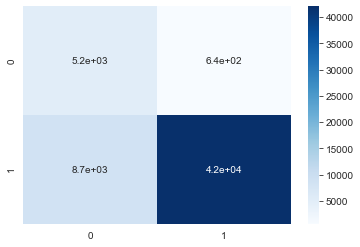

In [91]:
ax = sns.heatmap(confusion_matrix(y_test, test_preds), annot=True, cmap='Blues')
ax.set_ylim(2,0)

Well, the overall accuracy increased but recall is lower. It might be best to balance these metrics. I'm going to try one more thing that might help: boosted models. I want to use Adaboost, which will work to improve instances that are difficult to classify.

In [95]:
clf_adaboost = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', AdaBoostClassifier(random_state=10))])

clf_adaboost.fit(X_train, y_train)

train_preds = clf_adaboost.predict(X_train)
test_preds = clf_adaboost.predict(X_test)

scores(y_train, train_preds, y_test, test_preds)


Training Score:
              precision    recall  f1-score   support

           0       0.76      0.52      0.62     17424
           1       0.95      0.98      0.96    152393

    accuracy                           0.93    169817
   macro avg       0.85      0.75      0.79    169817
weighted avg       0.93      0.93      0.93    169817

------------------------------------------------------
Test Score:
              precision    recall  f1-score   support

           0       0.77      0.53      0.63      5849
           1       0.95      0.98      0.96     50757

    accuracy                           0.93     56606
   macro avg       0.86      0.76      0.79     56606
weighted avg       0.93      0.93      0.93     56606



In [96]:
clf_gbt = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', GradientBoostingClassifier(random_state=10))])

clf_gbt.fit(X_train, y_train)

train_preds = clf_gbt.predict(X_train)
test_preds = clf_gbt.predict(X_test)

scores(y_train, train_preds, y_test, test_preds)

Training Score:
              precision    recall  f1-score   support

           0       0.84      0.59      0.69     17424
           1       0.95      0.99      0.97    152393

    accuracy                           0.95    169817
   macro avg       0.90      0.79      0.83    169817
weighted avg       0.94      0.95      0.94    169817

------------------------------------------------------
Test Score:
              precision    recall  f1-score   support

           0       0.83      0.59      0.69      5849
           1       0.95      0.99      0.97     50757

    accuracy                           0.95     56606
   macro avg       0.89      0.79      0.83     56606
weighted avg       0.94      0.95      0.94     56606

